In [1]:
import numpy as np
import pandas as pd
from google.colab import drive
#drive.mount('/content/drive')
#csv_path = "/content/drive/MyDrive/Colab Notebooks/mushrooms.csv"
csv_path = "/content/mushrooms.csv"
df = pd.read_csv(csv_path,sep = ",")

In [2]:
cat_vars = ['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat']
cat_data = df[cat_vars]
from sklearn.preprocessing import OneHotEncoder
import numpy as np
# Create an instance of the OneHotEncoder class
encoder = OneHotEncoder()

# Fit and transform the data
encoded_data = encoder.fit_transform(cat_data)

# Print the encoded data
print(encoded_data.toarray().shape)

(8124, 117)


In [3]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
df['class'] = labelencoder.fit_transform(df['class'])

In [4]:
dfclass=df['class']

In [5]:
dfclass.columns = None

In [6]:
df2 = pd.DataFrame(encoded_data.toarray())

In [7]:
print(pd.concat([dfclass, df2], axis=1).shape)

(8124, 118)


In [8]:
newhot=pd.concat([dfclass, df2], axis=1)

In [9]:
from sklearn.decomposition import PCA
x = newhot.iloc[:, 1:].values
pcaModel = PCA(n_components=10)
X_r = pcaModel.fit(x).transform(x)

In [10]:
print(X_r.shape)

(8124, 10)


In [28]:
from sklearn.model_selection import train_test_split
y = newhot.iloc[:, 0].values
x = X_r
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.6,random_state=12)
print(x_train.shape)
print(x_test.shape)
np.count_nonzero(y)

(3249, 10)
(4875, 10)


3916

In [29]:
x_valid, x_test, y_valid, y_test = train_test_split(x_test,y_test,test_size=0.5,random_state=12)

In [30]:
print(x_train.shape)
print(x_test.shape)
print(x_valid.shape)

(3249, 10)
(2438, 10)
(2437, 10)


In [31]:
#decision Tree

In [32]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=10)
clf = clf.fit(x_train, y_train)

In [33]:
y_valid_hat = clf.predict(x_valid)

In [34]:
from sklearn.metrics import confusion_matrix

Cmat = confusion_matrix(y_valid, y_valid_hat )
acc = clf.score(x_valid,y_valid)

print("Confusion Matrix: ")
print(Cmat)
print("Accuracy: " + str(format(acc*100,'.2f')) + '%')

Confusion Matrix: 
[[1202    7]
 [   8 1220]]
Accuracy: 99.38%


In [35]:
y_hat = clf.predict(x_test)

In [36]:
Cmat = confusion_matrix(y_test, y_hat)
acc = clf.score(x_test,y_test)

print("Confusion Matrix: ")
print(Cmat)
print("Accuracy: " + str(format(acc*100,'.2f')) + '%')

Confusion Matrix: 
[[1244   10]
 [  10 1174]]
Accuracy: 99.18%


Area under curve (AUC) =  0.9967118368489625


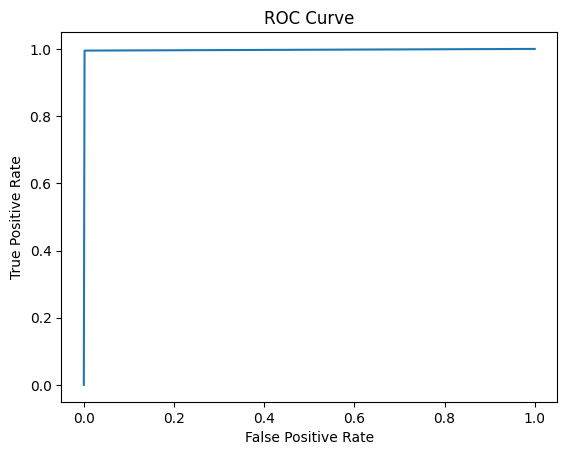

In [20]:
# ROC curve
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
fpr, tpr, threshold = metrics.roc_curve(y_test, y_hat)
roc_auc = metrics.roc_auc_score(y_test, y_hat)
print('Area under curve (AUC) = ',roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.plot(fpr,tpr)

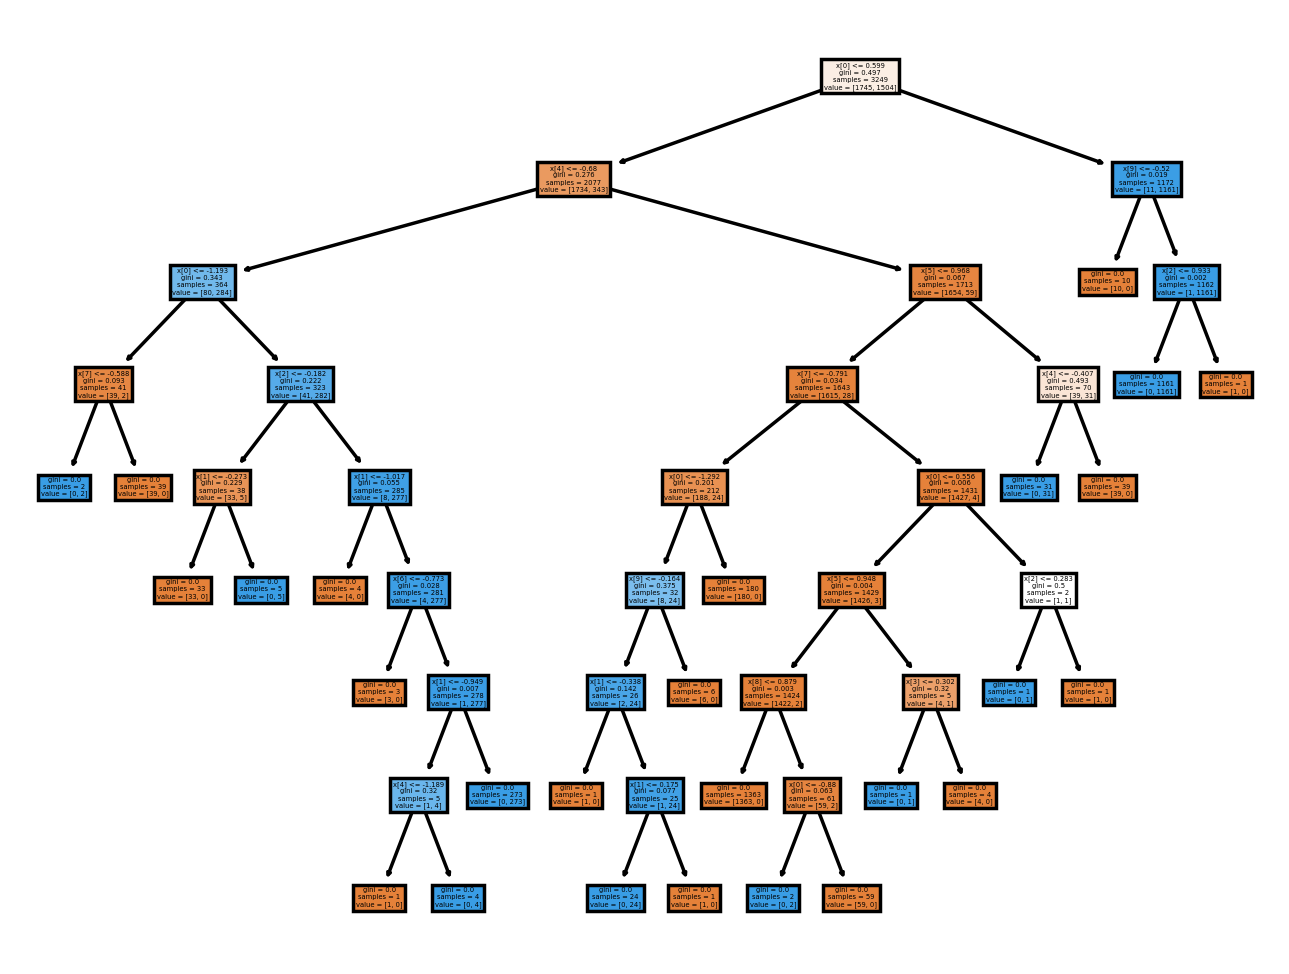

In [37]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(dpi=250)
plot_tree(clf, filled=True)
plt.show()

Confusion Matrix: 
[[1202    7]
 [   8 1220]]
Accuracy: 99.38%
Confusion Matrix: 
[[1241   13]
 [  13 1171]]
Accuracy: 98.93%


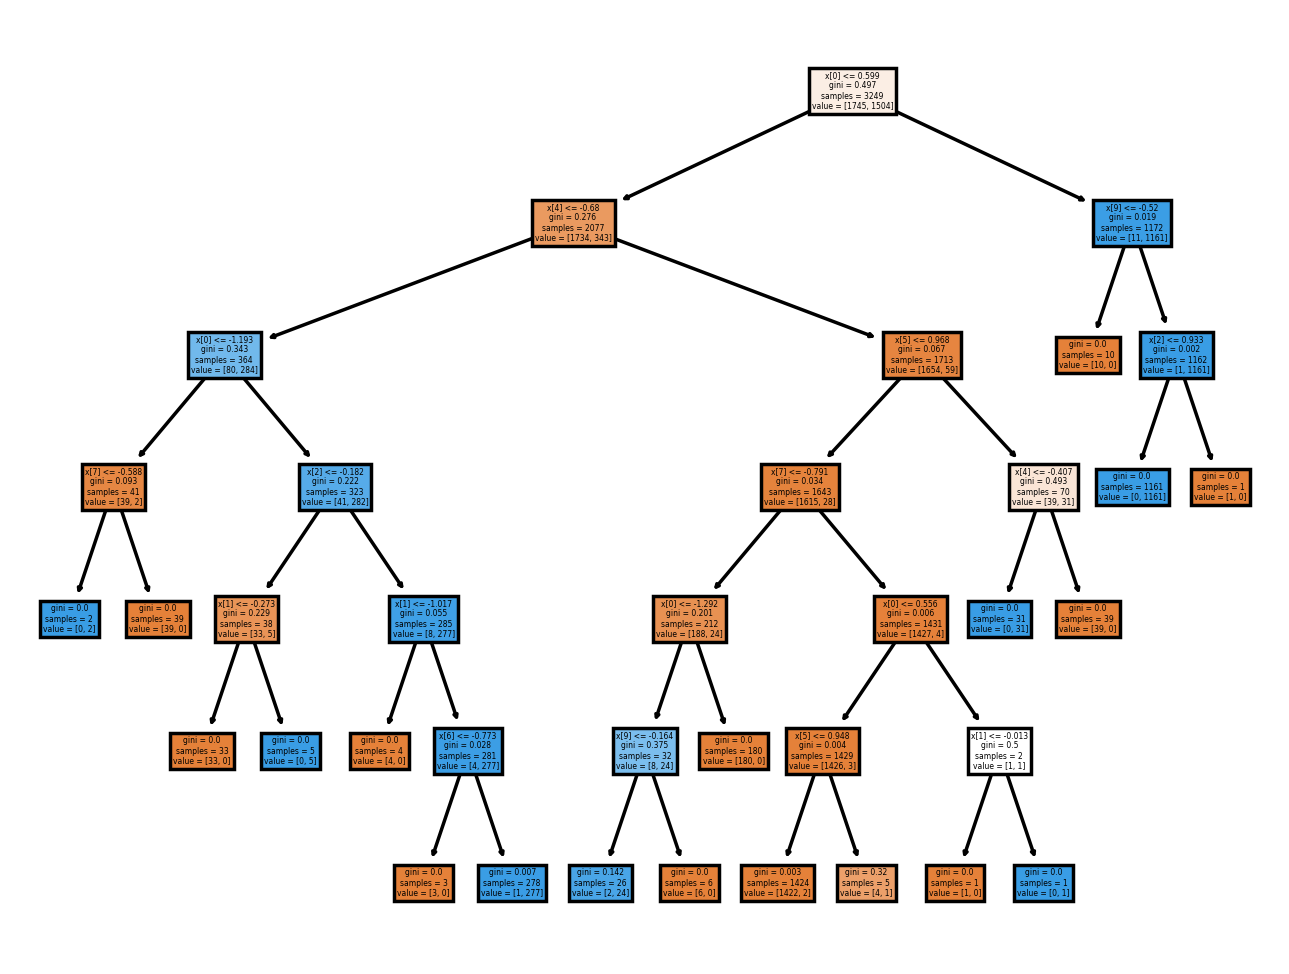

In [38]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=10,max_depth=6)
clf = clf.fit(x_train, y_train)
y_valid_hat = clf.predict(x_valid)
from sklearn.metrics import confusion_matrix

Cmat = confusion_matrix(y_valid, y_valid_hat )
acc = clf.score(x_valid,y_valid)

print("Confusion Matrix: ")
print(Cmat)
print("Accuracy: " + str(format(acc*100,'.2f')) + '%')
y_hat = clf.predict(x_test)
from sklearn.metrics import confusion_matrix

Cmat = confusion_matrix(y_test, y_hat)
acc = clf.score(x_test,y_test)

print("Confusion Matrix: ")
print(Cmat)
print("Accuracy: " + str(format(acc*100,'.2f')) + '%')
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(dpi=250)
plot_tree(clf, filled=True)
plt.show()

Confusion Matrix: 
[[1200    9]
 [   5 1223]]
Accuracy: 99.43%
Confusion Matrix: 
[[1233   12]
 [   6 1187]]
Accuracy: 99.26%


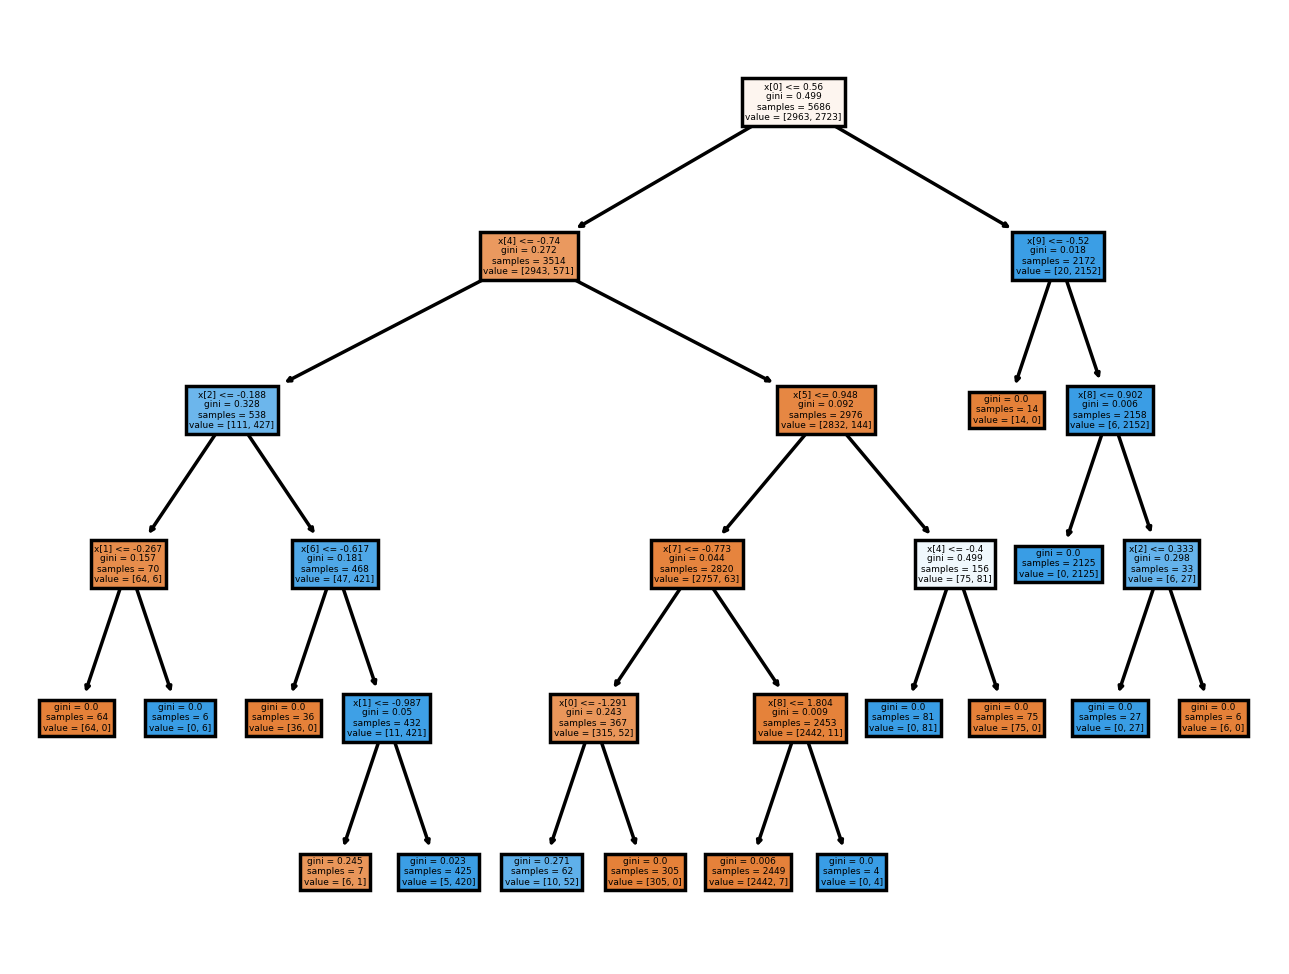

Area under curve (AUC) =  0.9926660539896383
fpr =  [0.         0.00963855 1.        ]
tpr =  [0.         0.99497066 1.        ]


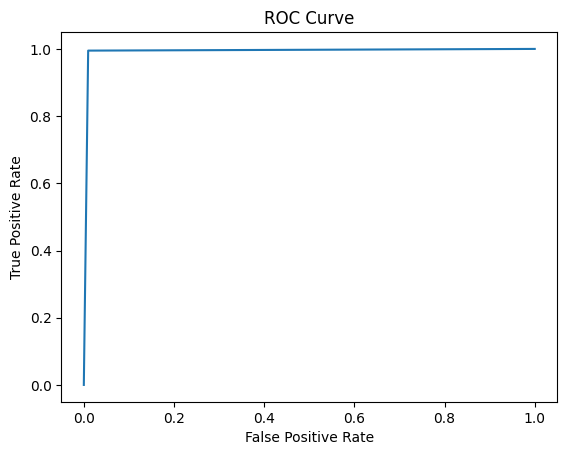

In [177]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=10,max_depth=5)
clf = clf.fit(x_train, y_train)
y_valid_hat = clf.predict(x_valid)
from sklearn.metrics import confusion_matrix

Cmat = confusion_matrix(y_valid, y_valid_hat )
acc = clf.score(x_valid,y_valid)

print("Confusion Matrix: ")
print(Cmat)
print("Accuracy: " + str(format(acc*100,'.2f')) + '%')
y_hat = clf.predict(x_test)
from sklearn.metrics import confusion_matrix

Cmat = confusion_matrix(y_test, y_hat)
acc = clf.score(x_test,y_test)

print("Confusion Matrix: ")
print(Cmat)
print("Accuracy: " + str(format(acc*100,'.2f')) + '%')
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(dpi=250)
plot_tree(clf, filled=True)
plt.savefig("decisontree5.png")
plt.show()
fpr, tpr, threshold = metrics.roc_curve(y_test, y_hat)
roc_auc = metrics.roc_auc_score(y_test, y_hat)
print('Area under curve (AUC) = ',roc_auc)
print('fpr = ',fpr)
print('tpr = ',tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.plot(fpr,tpr)
plt.savefig("ROCDT.png")

Confusion Matrix: 
[[1197   12]
 [  35 1193]]
Accuracy: 98.07%
Confusion Matrix: 
[[1237   17]
 [  36 1148]]
Accuracy: 97.83%


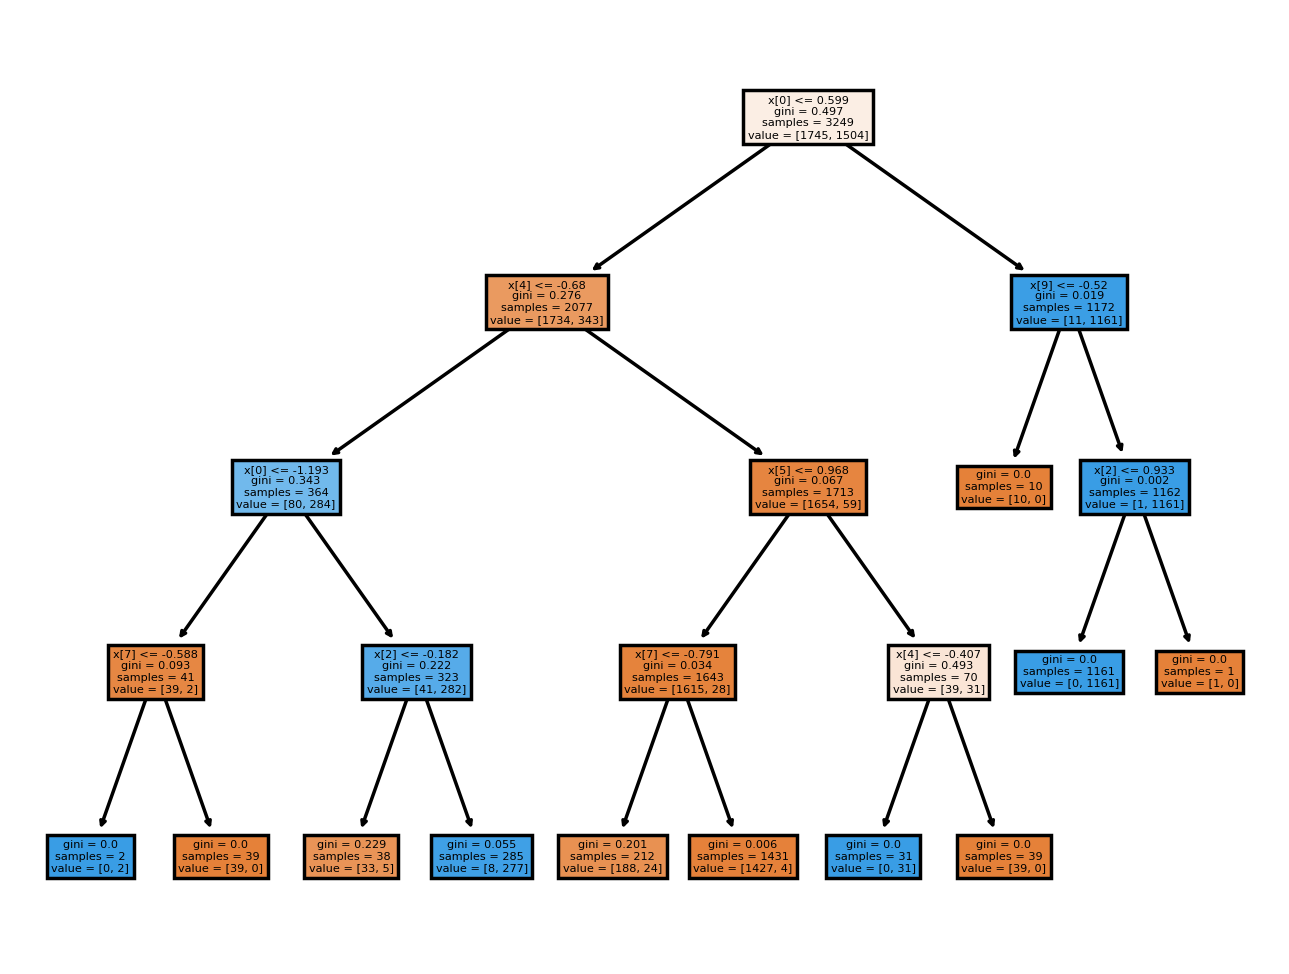

In [40]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=10,max_depth=4)
clf = clf.fit(x_train, y_train)
y_valid_hat = clf.predict(x_valid)
from sklearn.metrics import confusion_matrix

Cmat = confusion_matrix(y_valid, y_valid_hat )
acc = clf.score(x_valid,y_valid)

print("Confusion Matrix: ")
print(Cmat)
print("Accuracy: " + str(format(acc*100,'.2f')) + '%')
y_hat = clf.predict(x_test)
from sklearn.metrics import confusion_matrix

Cmat = confusion_matrix(y_test, y_hat)
acc = clf.score(x_test,y_test)

print("Confusion Matrix: ")
print(Cmat)
print("Accuracy: " + str(format(acc*100,'.2f')) + '%')
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(dpi=250)
plot_tree(clf, filled=True)
plt.show()

Confusion Matrix: 
[[1177   32]
 [  65 1163]]
Accuracy: 96.02%
Confusion Matrix: 
[[1214   40]
 [  54 1130]]
Accuracy: 96.14%


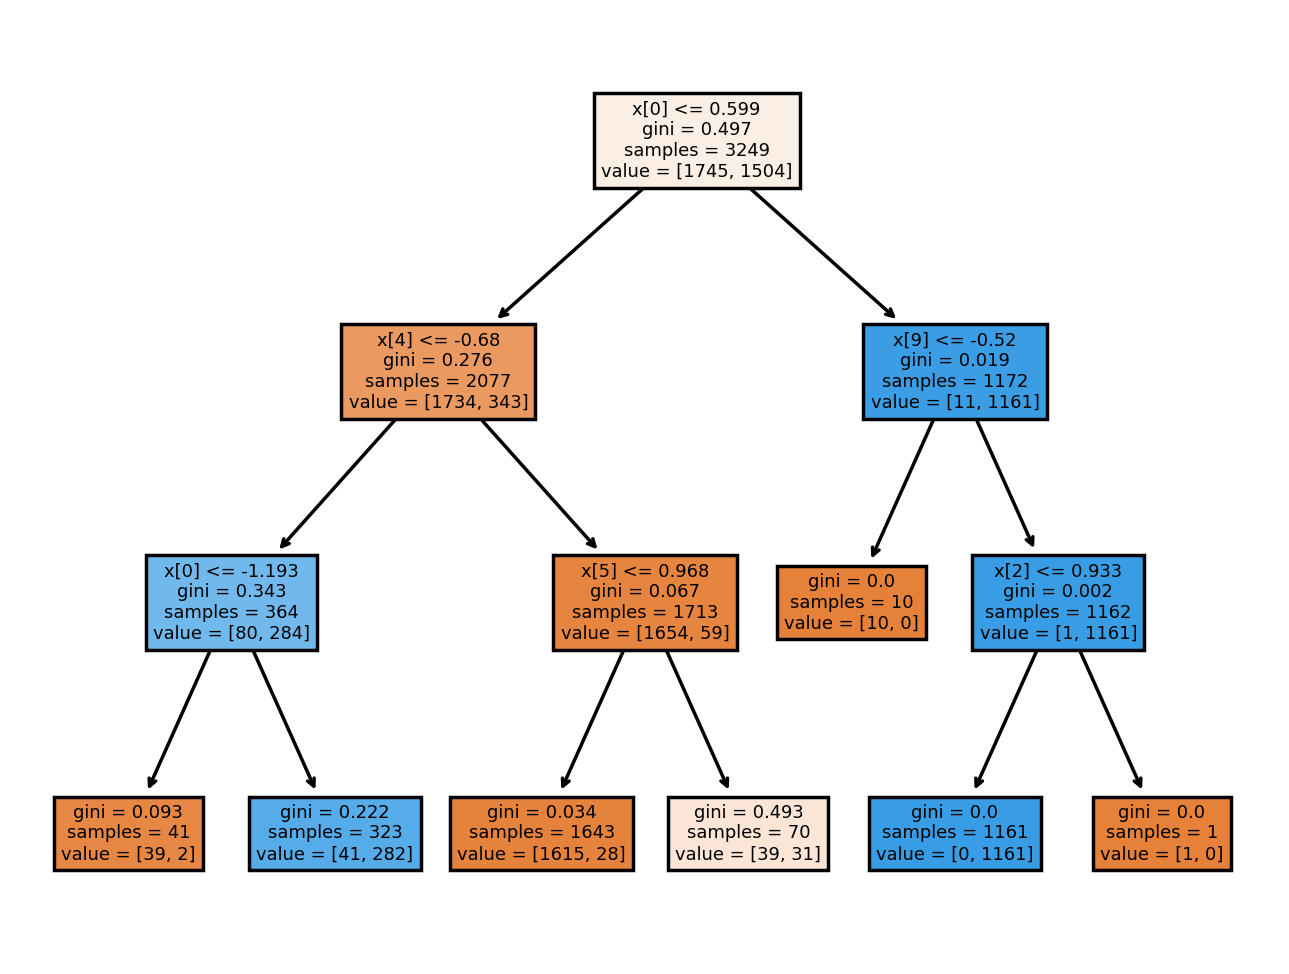

In [41]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=10,max_depth=3)
clf = clf.fit(x_train, y_train)
y_valid_hat = clf.predict(x_valid)
from sklearn.metrics import confusion_matrix

Cmat = confusion_matrix(y_valid, y_valid_hat )
acc = clf.score(x_valid,y_valid)

print("Confusion Matrix: ")
print(Cmat)
print("Accuracy: " + str(format(acc*100,'.2f')) + '%')
y_hat = clf.predict(x_test)
from sklearn.metrics import confusion_matrix

Cmat = confusion_matrix(y_test, y_hat)
acc = clf.score(x_test,y_test)

print("Confusion Matrix: ")
print(Cmat)
print("Accuracy: " + str(format(acc*100,'.2f')) + '%')
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(dpi=250)
plot_tree(clf, filled=True)
plt.show()

Confusion Matrix: 
[[1144   65]
 [  63 1165]]
Accuracy: 94.75%
Confusion Matrix: 
[[1189   65]
 [  52 1132]]
Accuracy: 95.20%


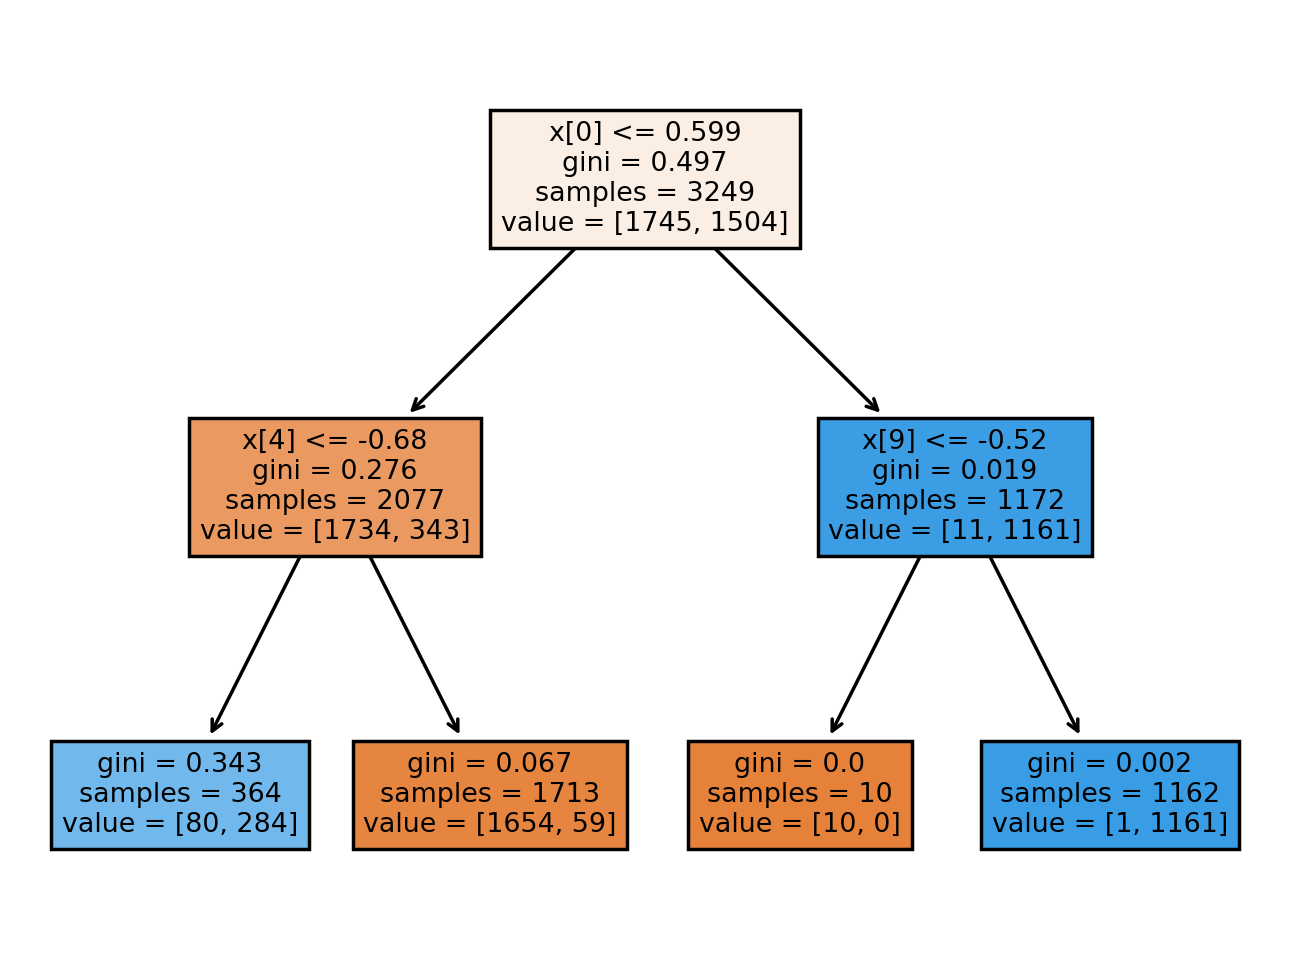

In [42]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=10,max_depth=2)
clf = clf.fit(x_train, y_train)
y_valid_hat = clf.predict(x_valid)
from sklearn.metrics import confusion_matrix

Cmat = confusion_matrix(y_valid, y_valid_hat )
acc = clf.score(x_valid,y_valid)

print("Confusion Matrix: ")
print(Cmat)
print("Accuracy: " + str(format(acc*100,'.2f')) + '%')
y_hat = clf.predict(x_test)
from sklearn.metrics import confusion_matrix

Cmat = confusion_matrix(y_test, y_hat)
acc = clf.score(x_test,y_test)

print("Confusion Matrix: ")
print(Cmat)
print("Accuracy: " + str(format(acc*100,'.2f')) + '%')
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(dpi=250)
plot_tree(clf, filled=True)
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=10,max_depth=1)
clf = clf.fit(x_train, y_train)
y_valid_hat = clf.predict(x_valid)
from sklearn.metrics import confusion_matrix

Cmat = confusion_matrix(y_valid, y_valid_hat )
acc = clf.score(x_valid,y_valid)

print("Confusion Matrix: ")
print(Cmat)
print("Accuracy: " + str(format(acc*100,'.2f')) + '%')
y_hat = clf.predict(x_test)
from sklearn.metrics import confusion_matrix

Cmat = confusion_matrix(y_test, y_hat)
acc = clf.score(x_test,y_test)

print("Confusion Matrix: ")
print(Cmat)
print("Accuracy: " + str(format(acc*100,'.2f')) + '%')
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(dpi=250)
plot_tree(clf, filled=True)
plt.show()

In [ ]:
# ROC curve
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
fpr, tpr, threshold = metrics.roc_curve(y_test, y_hat)
roc_auc = metrics.roc_auc_score(y_test, y_hat)
print('Area under curve (AUC) = ',roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.plot(fpr,tpr)

Logistic Regression

In [184]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression(max_iter=1000)

model.fit(x_train, y_train)

y_pred = model.predict(x_valid)
accuracy = accuracy_score(y_valid, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9610176446450553


Accuracy: 0.9606234618539786
Confusion Matrix: 
[[1210   35]
 [  61 1132]]
Area under curve (AUC) =  0.9603779745974679
fpr =  [0.         0.02811245 1.        ]
tpr =  [0.        0.9488684 1.       ]


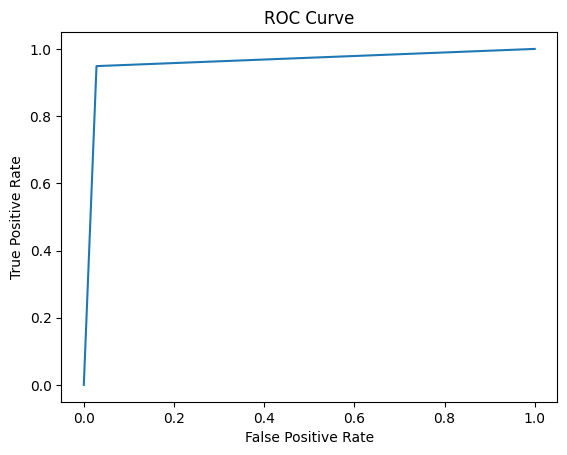

In [185]:
y_pred_test = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred_test)
print("Accuracy:", accuracy)
Cmat = confusion_matrix(y_test,y_pred_test)
print("Confusion Matrix: ")
print(Cmat)
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred_test)
roc_auc = metrics.roc_auc_score(y_test, y_pred_test)
print('Area under curve (AUC) = ',roc_auc)
print('fpr = ',fpr)
print('tpr = ',tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.plot(fpr,tpr)
plt.savefig("ROCLR.png")

NN

In [180]:
from keras.utils.vis_utils import plot_model
from keras.utils import to_categorical
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=12)
print(x_train.shape)
print(x_test.shape)

(5686, 10)
(2438, 10)


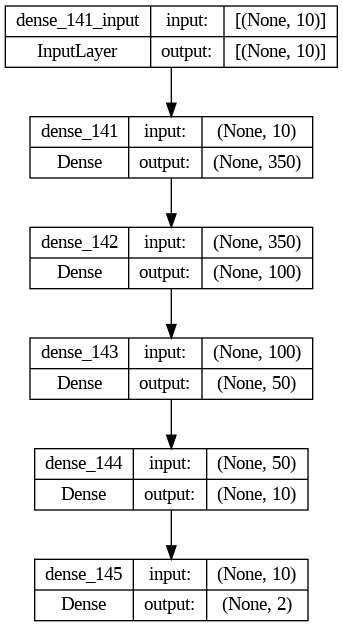

In [181]:
# Model 1
feature_vector_length = 10
input_shape = (feature_vector_length,)
num_classes = 2

x_train = x_train.reshape(x_train.shape[0], feature_vector_length)
x_test = x_test.reshape(x_test.shape[0], feature_vector_length)

model = Sequential()
model.add(Dense(350, input_shape=input_shape, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
plot_model(model, to_file='model_plot4-350.png', show_shapes=True, show_layer_names=True)

In [182]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10, batch_size=250, verbose=1, validation_split=0.4)

Epoch 1/10
14/14 [==============================] - 1s 26ms/step - loss: 0.4188 - accuracy: 0.8684 - val_loss: 0.1767 - val_accuracy: 0.9451
Epoch 2/10
14/14 [==============================] - 0s 12ms/step - loss: 0.1267 - accuracy: 0.9557 - val_loss: 0.0732 - val_accuracy: 0.9710
Epoch 3/10
14/14 [==============================] - 0s 12ms/step - loss: 0.0763 - accuracy: 0.9704 - val_loss: 0.0470 - val_accuracy: 0.9815
Epoch 4/10
14/14 [==============================] - 0s 12ms/step - loss: 0.0465 - accuracy: 0.9833 - val_loss: 0.0329 - val_accuracy: 0.9908
Epoch 5/10
14/14 [==============================] - 0s 9ms/step - loss: 0.0296 - accuracy: 0.9889 - val_loss: 0.0240 - val_accuracy: 0.9916
Epoch 6/10
14/14 [==============================] - 0s 10ms/step - loss: 0.0196 - accuracy: 0.9933 - val_loss: 0.0198 - val_accuracy: 0.9960
Epoch 7/10
14/14 [==============================] - 0s 9ms/step - loss: 0.0137 - accuracy: 0.9968 - val_loss: 0.0163 - val_accuracy: 0.9960
Epoch 8/10
14/1

77/77 [==============================] - 0s 2ms/step - loss: 0.0095 - accuracy: 0.9988
Test results - Loss: 0.009485365822911263 - Accuracy: 0.9987694621086121%
77/77 [==============================] - 0s 1ms/step
Outputs shape
(2438, 2)
(2438,)
Confusion Matrix: 
[[1242    3]
 [   0 1193]]
Area under curve (AUC) =  0.9987951807228916
fpr =  [0.         0.00240964 1.        ]
tpr =  [0. 1. 1.]


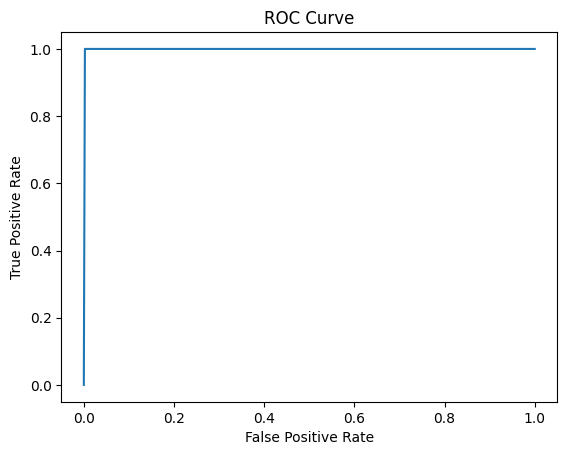

In [183]:
test_results = model.evaluate(x_test, y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]}%')
seq_predictions=model.predict(x_test)
print('Outputs shape')    
print(seq_predictions.shape) # prints (n,1) but  need (n,)
seq_predictions=np.transpose(seq_predictions)[0]  # transformation to get (n,)
print(seq_predictions.shape)  # now the shape is (n,)
# Applying transformation to get binary values predictions with 0.5 as thresold
seq_predictions = list(map(lambda x: 1 if x<0.5 else 0, seq_predictions))
Cmat = confusion_matrix(y_test,seq_predictions)
print("Confusion Matrix: ")
print(Cmat)
fpr, tpr, threshold = metrics.roc_curve(y_test, seq_predictions)
roc_auc = metrics.roc_auc_score(y_test, seq_predictions)
print('Area under curve (AUC) = ',roc_auc)
print('fpr = ',fpr)
print('tpr = ',tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.plot(fpr,tpr)
plt.savefig("ROCNN.png")

In [ ]:
y_hat_binary = to_categorical(y_hat, num_classes)
y_hat_binary.size

Cmat = confusion_matrix(y_test, y_hat)
print("Confusion Matrix: ")
print(Cmat)
test_results

In [109]:
# model 2
model2 = Sequential()
model2.add(Dense(32, input_shape=input_shape, activation='relu'))
model2.add(Dense(20, activation='relu'))
model2.add(Dense(num_classes, activation='softmax'))

In [110]:
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model2.fit(x_train, y_train, epochs=10, batch_size=250, verbose=1, validation_split=0.4)

Epoch 1/10
14/14 [==============================] - 1s 20ms/step - loss: 0.6369 - accuracy: 0.6373 - val_loss: 0.5792 - val_accuracy: 0.7749
Epoch 2/10
14/14 [==============================] - 0s 5ms/step - loss: 0.5398 - accuracy: 0.8285 - val_loss: 0.4859 - val_accuracy: 0.8879
Epoch 3/10
14/14 [==============================] - 0s 5ms/step - loss: 0.4455 - accuracy: 0.8863 - val_loss: 0.3919 - val_accuracy: 0.9130
Epoch 4/10
14/14 [==============================] - 0s 6ms/step - loss: 0.3538 - accuracy: 0.9197 - val_loss: 0.3025 - val_accuracy: 0.9473
Epoch 5/10
14/14 [==============================] - 0s 5ms/step - loss: 0.2726 - accuracy: 0.9425 - val_loss: 0.2267 - val_accuracy: 0.9596
Epoch 6/10
14/14 [==============================] - 0s 6ms/step - loss: 0.2095 - accuracy: 0.9505 - val_loss: 0.1716 - val_accuracy: 0.9670
Epoch 7/10
14/14 [==============================] - 0s 5ms/step - loss: 0.1657 - accuracy: 0.9525 - val_loss: 0.1345 - val_accuracy: 0.9675
Epoch 8/10
14/14 [=

In [111]:
test_results = model2.evaluate(x_test, y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]}%')

77/77 [==============================] - 0s 2ms/step - loss: 0.0860 - accuracy: 0.9742
Test results - Loss: 0.08600009977817535 - Accuracy: 0.9741591215133667%


Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_81 (Dense)            (None, 350)               3850      
                                                                 
 dense_82 (Dense)            (None, 100)               35100     
                                                                 
 dense_83 (Dense)            (None, 10)                1010      
                                                                 
 dense_84 (Dense)            (None, 2)                 22        
                                                                 
Total params: 39,982
Trainable params: 39,982
Non-trainable params: 0
_________________________________________________________________
None


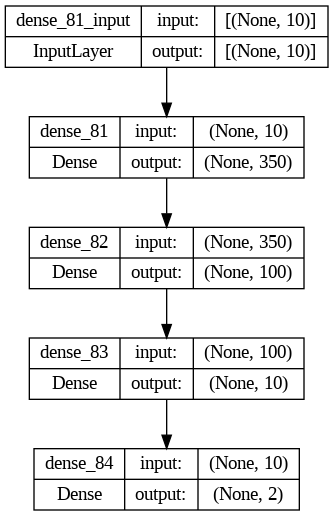

In [99]:
# model 3
model3 = Sequential()
model3.add(Dense(350, input_shape=input_shape, activation='relu'))
model3.add(Dense(100, activation='relu'))
model3.add(Dense(10, activation='relu'))
model3.add(Dense(num_classes, activation='softmax'))
print(model3.summary())
plot_model(model3, to_file='model_plot4-350.png', show_shapes=True, show_layer_names=True)

In [96]:
model3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model3.fit(x_train, y_train, epochs=10, batch_size=250, verbose=1, validation_split=0.4)

Epoch 1/10
14/14 [==============================] - 1s 19ms/step - loss: 0.4936 - accuracy: 0.8001 - val_loss: 0.4139 - val_accuracy: 0.9481
Epoch 2/10
14/14 [==============================] - 0s 8ms/step - loss: 0.3726 - accuracy: 0.9481 - val_loss: 0.3330 - val_accuracy: 0.9745
Epoch 3/10
14/14 [==============================] - 0s 9ms/step - loss: 0.2555 - accuracy: 0.9719 - val_loss: 0.1658 - val_accuracy: 0.9859
Epoch 4/10
14/14 [==============================] - 0s 7ms/step - loss: 0.1231 - accuracy: 0.9757 - val_loss: 0.0714 - val_accuracy: 0.9859
Epoch 5/10
14/14 [==============================] - 0s 8ms/step - loss: 0.0759 - accuracy: 0.9774 - val_loss: 0.0470 - val_accuracy: 0.9886
Epoch 6/10
14/14 [==============================] - 0s 7ms/step - loss: 0.0559 - accuracy: 0.9798 - val_loss: 0.0343 - val_accuracy: 0.9916
Epoch 7/10
14/14 [==============================] - 0s 11ms/step - loss: 0.0395 - accuracy: 0.9859 - val_loss: 0.0265 - val_accuracy: 0.9943
Epoch 8/10
14/14 [

In [97]:
test_results = model3.evaluate(x_test, y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]}%')

77/77 [==============================] - 0s 1ms/step - loss: 0.0131 - accuracy: 0.9979
Test results - Loss: 0.013117796741425991 - Accuracy: 0.9979491233825684%


Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_110 (Dense)           (None, 32)                352       
                                                                 
 dense_111 (Dense)           (None, 20)                660       
                                                                 
 dense_112 (Dense)           (None, 10)                210       
                                                                 
 dense_113 (Dense)           (None, 5)                 55        
                                                                 
 dense_114 (Dense)           (None, 2)                 12        
                                                                 
Total params: 1,289
Trainable params: 1,289
Non-trainable params: 0
_________________________________________________________________
None


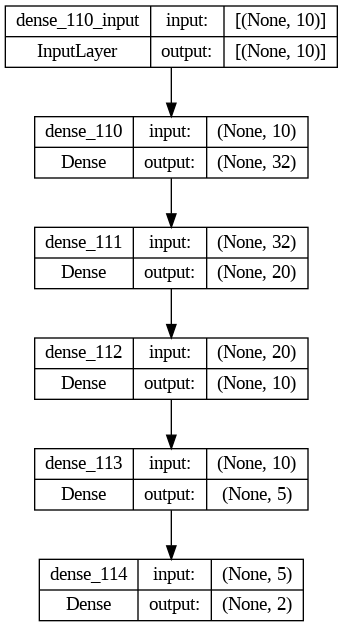

In [122]:
# model 4
model4 = Sequential()
model4.add(Dense(32, input_shape=input_shape, activation='relu'))
model4.add(Dense(20, activation='relu'))
model4.add(Dense(10, activation='relu'))
model4.add(Dense(5, activation='relu'))
model4.add(Dense(num_classes, activation='softmax'))
print(model4.summary())
plot_model(model4, to_file='model_plot4-32.png', show_shapes=True, show_layer_names=True)

In [123]:
model4.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model4.fit(x_train, y_train, epochs=10, batch_size=250, verbose=1, validation_split=0.4)

Epoch 1/10
14/14 [==============================] - 1s 18ms/step - loss: 0.6623 - accuracy: 0.6001 - val_loss: 0.6105 - val_accuracy: 0.8207
Epoch 2/10
14/14 [==============================] - 0s 5ms/step - loss: 0.5789 - accuracy: 0.8734 - val_loss: 0.5319 - val_accuracy: 0.9015
Epoch 3/10
14/14 [==============================] - 0s 6ms/step - loss: 0.4922 - accuracy: 0.9132 - val_loss: 0.4340 - val_accuracy: 0.9218
Epoch 4/10
14/14 [==============================] - 0s 6ms/step - loss: 0.3848 - accuracy: 0.9320 - val_loss: 0.3208 - val_accuracy: 0.9358
Epoch 5/10
14/14 [==============================] - 0s 9ms/step - loss: 0.2738 - accuracy: 0.9484 - val_loss: 0.2137 - val_accuracy: 0.9578
Epoch 6/10
14/14 [==============================] - 0s 5ms/step - loss: 0.1814 - accuracy: 0.9607 - val_loss: 0.1348 - val_accuracy: 0.9675
Epoch 7/10
14/14 [==============================] - 0s 5ms/step - loss: 0.1242 - accuracy: 0.9634 - val_loss: 0.0939 - val_accuracy: 0.9710
Epoch 8/10
14/14 [=

In [124]:
test_results = model4.evaluate(x_test, y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]}%')

77/77 [==============================] - 0s 2ms/step - loss: 0.0549 - accuracy: 0.9795
Test results - Loss: 0.05487975478172302 - Accuracy: 0.9794914126396179%
